# Nigep example using MNIST dataset

In [1]:
! pip install nigep

zsh:1: command not found: pip


In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../src/nigep/*'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.nigep import Nigep
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers.legacy import RMSprop
from keras.datasets import mnist
from keras.utils import to_categorical


### Load and preprocess MNIST dataset from Keras package

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train / 255
X_test = X_test / 255

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

INPUT_DIMS = X_train.shape[1]
OUTPUT_DIMS = 10

y_train_one_hot = to_categorical(y_train, num_classes=OUTPUT_DIMS)

### Build and compile the MLP model

In [4]:
NUM_EPOCHS = 20

model = Sequential()

model.add(Dense(512, activation="sigmoid", input_shape=(INPUT_DIMS,), name="Hidden_layer_1"))
model.add(Dense(128, activation="sigmoid", name="Hidden_layer_2"))

model.add(Dense(OUTPUT_DIMS, activation="softmax", name="output_layer"))

model.build()

model.compile(optimizer=RMSprop(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer_1 (Dense)      (None, 512)               401920    
                                                                 
 Hidden_layer_2 (Dense)      (None, 128)               65664     
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 468874 (1.79 MB)
Trainable params: 468874 (1.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Execute Nigep to obtain the Generalization Profile results

In [6]:
nigep = Nigep(
    execution_name='mnist',
    x_data=X_train,
    y_data=y_train_one_hot,
    model=model,
    batch_size=128,
    input_shape=INPUT_DIMS,
    class_mode='categorical',
    k_fold_n=5,
    target_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
    epochs=1,
)

nigep.execute()

375/375 [==============================] - 0s 601us/step


/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vmberto/Documents/nigep/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

375/375 [==============================] - 0s 526us/step


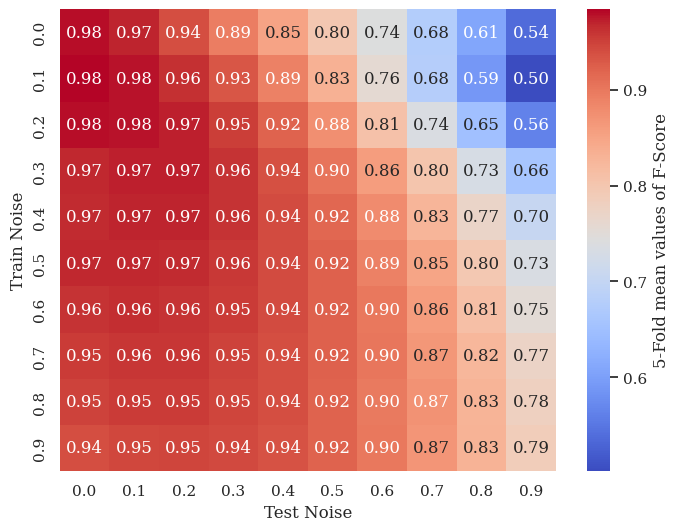

In [7]:
nigep.plot_and_save_generalization_profile()